In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Preprocesamiento de los datos
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_cats_dir = "/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/data-cats"
train_dogs_dir = "/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/data-dogs"

train_generator = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/",
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/",
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='validation')

# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
      train_generator,
      validation_data=validation_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      validation_steps=validation_generator.samples // validation_generator.batch_size,
      epochs=15,verbose=1)



Found 209 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


Epoch 1/15
6/6 [==============================] - 14s 2s/step - loss: 7.1963 - accuracy: 0.4915 - val_loss: 0.6648 - val_accuracy: 0.5625
Epoch 2/15
6/6 [==============================] - 12s 2s/step - loss: 0.6943 - accuracy: 0.6102 - val_loss: 0.6503 - val_accuracy: 0.6875
Epoch 3/15
6/6 [==============================] - 12s 2s/step - loss: 0.6666 - accuracy: 0.5932 - val_loss: 0.6473 - val_accuracy: 0.6250
Epoch 4/15
6/6 [==============================] - 12s 2s/step - loss: 0.7208 - accuracy: 0.5085 - val_loss: 0.6567 - val_accuracy: 0.5938
Epoch 5/15
6/6 [==============================] - 11s 2s/step - loss: 0.6491 - accuracy: 0.6045 - val_loss: 0.6357 - val_accuracy: 0.6875
Epoch 6/15
6/6 [==============================] - 12s 2s/step - loss: 0.5994 - accuracy: 0.7119 - val_loss: 0.6324 - val_accuracy: 0.6875
Epoch 7/15
6/6 [==============================] - 12s 2s/step - loss: 0.6764 - accuracy: 0.6667 - val_loss: 0.6221 - val_accuracy: 0.6250
Epoch 8/15
6/6 [==================

In [13]:
# Evaluar el modelo
model.evaluate(train_generator)

# Hacer predicciones con el modelo
predictions = model.predict(train_generator)


7/7 [==============================] - 6s 684ms/step


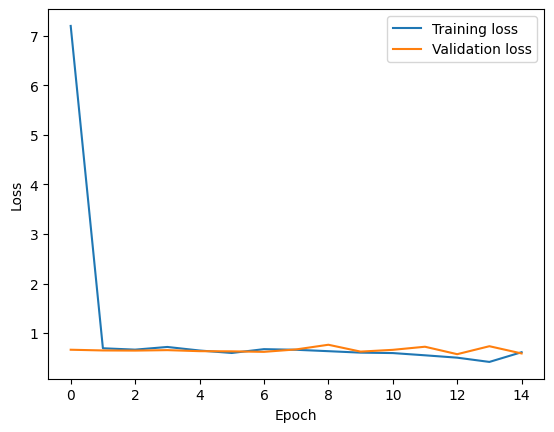

In [11]:
# Graficar la pérdida
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

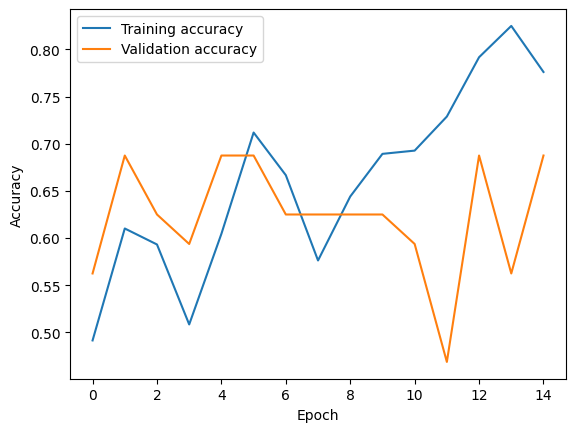

In [12]:
# Graficar la precisión
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2/2 [==============================] - 1s 229ms/step
Matriz de confusión:
[[ 9 12]
 [16 15]]


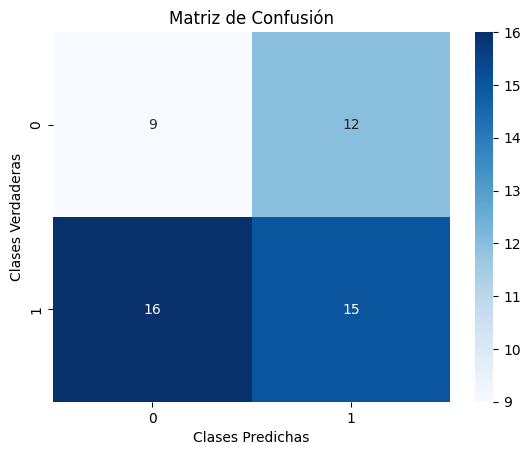

In [17]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener las predicciones en el conjunto de validación
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred)

# Obtener las verdaderas etiquetas en el conjunto de validación
y_true = validation_generator.labels

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

print("Matriz de confusión:")
print(cm)

# Creamos una visualización de la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")
plt.show()
#clase 0 = cat
#clase 1= dog